# K-Bandit Algorithm
## Takao Oba

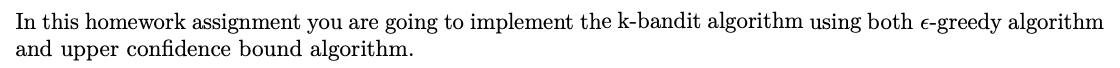

In [14]:
# Importing nesessary packages
import numpy as np
import matplotlib.pyplot as plt
import random
import math



In [15]:
np.random.seed(2020)
def getSamplar():
    mu=np.random.normal(0,10)
    sd=abs(np.random.normal(5,2))
    getSample=lambda: np.random.normal(mu,sd)
    return getSample


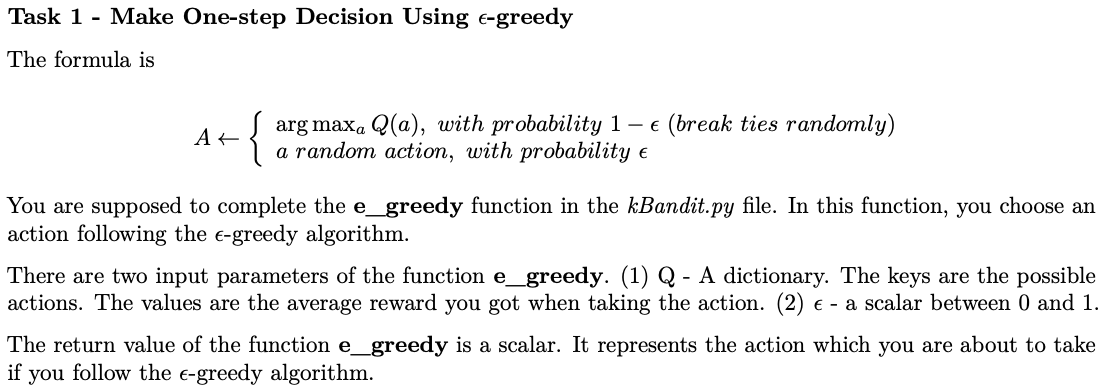

In [3]:
def e_greedy(Q, e):

##################################################
#		Your code here

    # arg max of Q
    max_val = [keys for keys,values in Q.items() if values == max(Q.values())] 
    if len(max_val) == 1:
        out = max_val[0]
    elif len(max_val) > 1:
        out = random.choice(max_val)
        
    # Choosing a random action with the probability e
    out2 = random.choice(list(Q.keys()))
    
    
    # Take weighted sampling respectively with "1-e" and "e"
    action = random.choices(population = [out,out2], weights = [1-e,e])
    action = action[0]
##################################################  
    
    return action

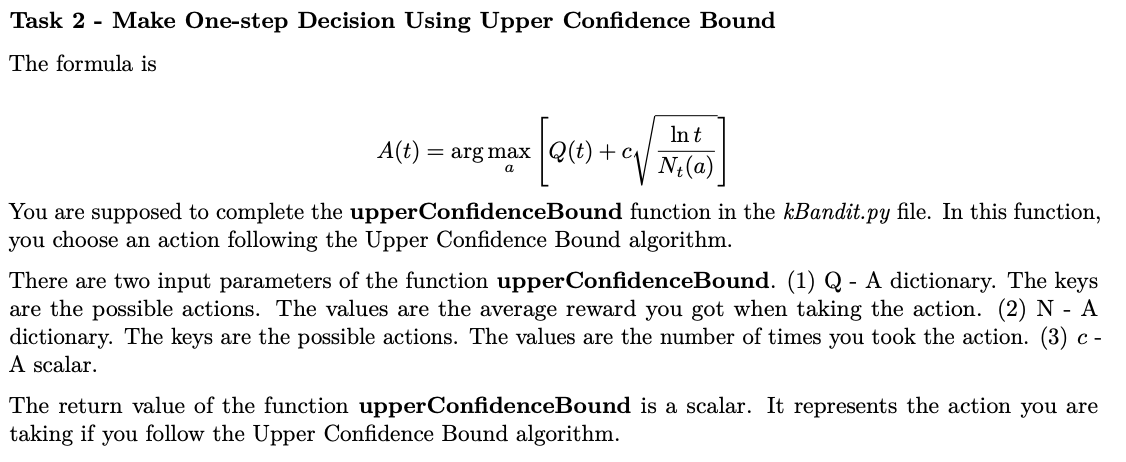

In [4]:

    
def upperConfidenceBound(Q, N, c):
   
# ##################################################
# #		Your code here
    
    temp = []
    
    for i in range(len(Q)):
        
        # Check if N(a) == 0
        if list(N.values())[i] == 0:
            temp.append(math.inf)
            
        # Perform the mathematic operations
        else:
            temp2 = math.sqrt(np.log(i + 1) / list(N.values())[i])
            temp3 = list(Q.values())[i] + c*temp2
            temp.append(temp3)
    
    temp4 = [i for i, x in enumerate(temp) if x == max(temp)]
    if len(temp4) == 1:
        index = temp4[0]
    elif len(temp4) > 1:
        index = random.choice(temp4)
    action = list(Q.keys())[index]


# ##################################################  
 
    return action



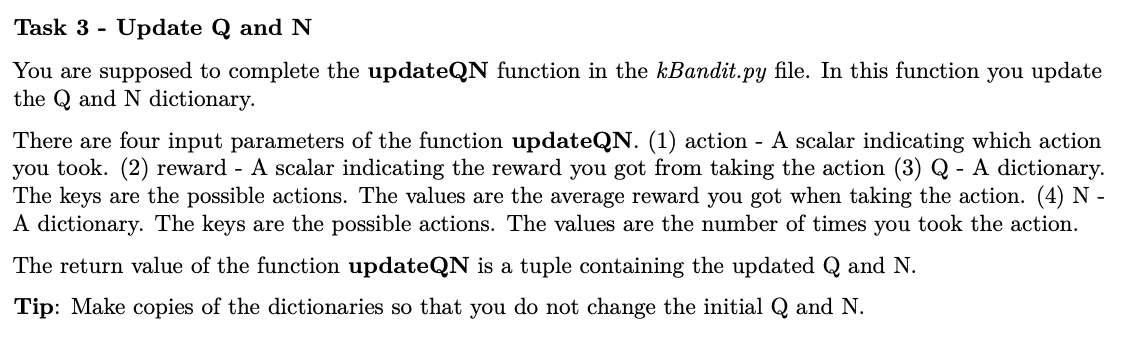

In [5]:

def updateQN(action, reward, Q, N):

##################################################
#		Your code here
    
    QNew = Q.copy()
    NNew = N.copy()
#     print(NNew)

    # updating NNew
    temp = N[action]
    up_dict = {action:(int(temp) + 1)}
    NNew.update(up_dict)
    
    # updating QNew
    temp2 = Q[action]
#     newMean = ((int(temp) * float(temp2)) + reward) / (int(temp) + 1)
    newMean = Q[action] + (reward - Q[action])/(NNew[action])
    # Assess if the mean should be best represented as an int
    if newMean % 1 == 0:
        newMean = int(newMean)
    up_dict2 = {action:newMean}
    QNew.update(up_dict2)
    

##################################################  
 
    return QNew, NNew


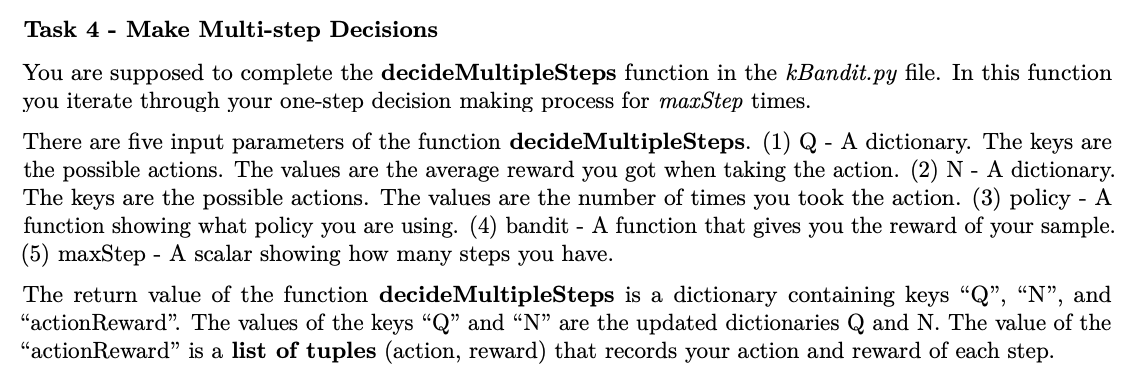

In [6]:


def decideMultipleSteps(Q, N, policy, bandit, maxSteps):

##################################################
#		Your code here

    actionReward = []
    for i in range(maxSteps):
        action = policy(Q,N)
        reward = bandit(action)
        temp = updateQN(action, reward, Q,N)
        Q = temp[0]
        N = temp[1]
        actionReward.append((action, reward))



##################################################  
 
    return {'Q':Q, 'N':N, 'actionReward':actionReward}



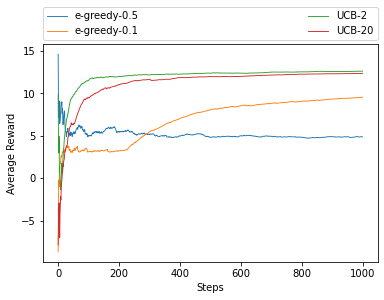

In [13]:
def plotMeanReward(actionReward,label):
    maxSteps=len(actionReward)
    reward=[reward for (action,reward) in actionReward]
    meanReward=[sum(reward[:(i+1)])/(i+1) for i in range(maxSteps)]
    plt.plot(range(maxSteps), meanReward, linewidth=0.9, label=label)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')

def main():
    np.random.seed(2020)
    random.seed(2020)
    K=10
    maxSteps=1000
    Q={k:0 for k in range(K)}
    N={k:0 for k in range(K)}
    testBed={k:getSamplar() for k in range(K)}
    bandit=lambda action: testBed[action]()
    
    policies={}
    policies["e-greedy-0.5"]=lambda Q, N: e_greedy(Q, 0.5)
    policies["e-greedy-0.1"]=lambda Q, N: e_greedy(Q, 0.1)
    policies["UCB-2"]=lambda Q, N: upperConfidenceBound(Q, N, 2)
    policies["UCB-20"]=lambda Q, N: upperConfidenceBound(Q, N, 20)
    
    allResults = {name: decideMultipleSteps(Q, N, policy, bandit, maxSteps) for (name, policy) in policies.items()}
    
    for name, result in allResults.items():
         plotMeanReward(allResults[name]['actionReward'], label=name)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
    plt.show()
    


if __name__=='__main__':
    main()
